# 8. Neural networks and deep learning

### 8.1 Fashion classification

Dataset:

Full: https://github.com/alexeygrigorev/clothing-dataset

Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

https://cs231n.github.io/

In [1]:
!git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 384 (delta 0), pack-reused 3439
Receiving objects: 100% (3839/3839), 100.58 MiB | 14.24 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Updating files: 100% (3783/3783), done.


### 8.2 TensorFlow and Keras

Installing TensorFlow

Loading images

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
import tensorflow as tf
from tensorflow import keras

2022-10-29 18:42:28.469184: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Tensorflow is a library for training deeplearning models and keras is higher level abstraction on the top of tensorflow.
<div>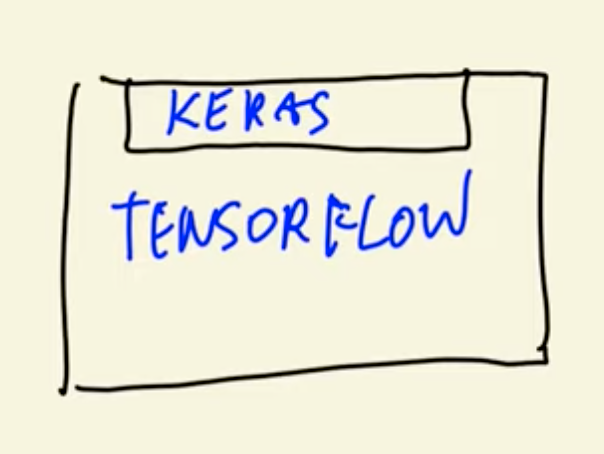</div>


In [6]:
from tensorflow.keras.preprocessing.image import load_img

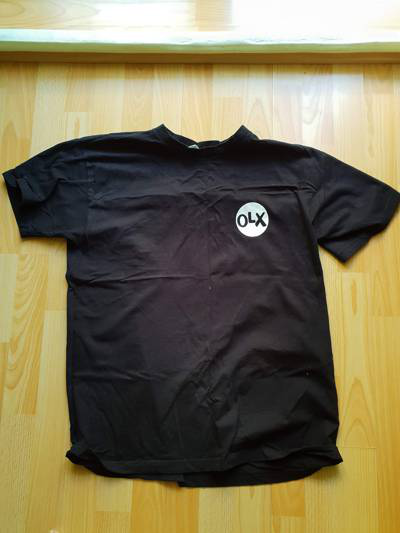

In [7]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [8]:
img = load_img(fullname, target_size=(299, 299))

In [9]:
x = np.array(img)
x.shape

(299, 299, 3)

This image is a numpay array with 3 channels (red, green and blue) and for each of the channels we have array. And this array contains array between numbers 0 and 255. It's one bite for wach cell
<div>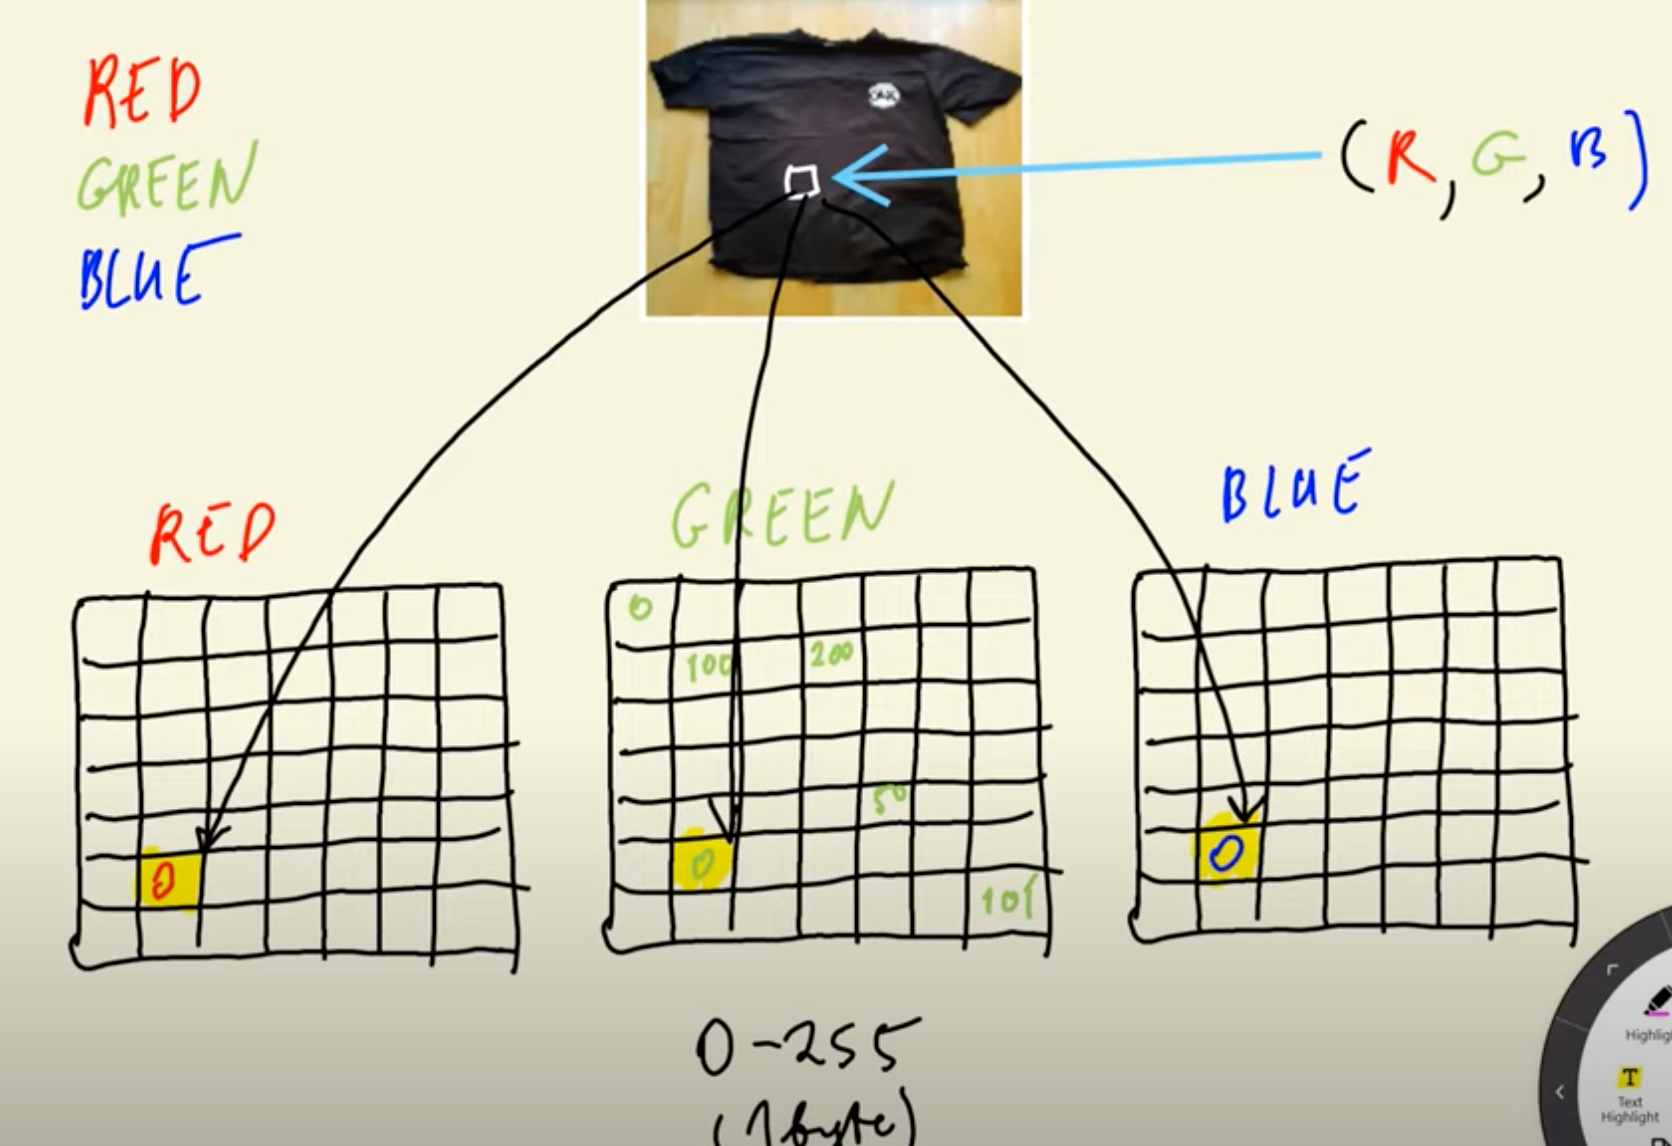</div>

## 8.3 Pre-trained convolutional neural networks

Imagenet dataset: https://www.image-net.org/

Pre-trained models: https://keras.io/api/applications/

In [10]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [11]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2022-10-29 20:28:58.370981: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


91884032/91884032 [==============================] - 4s 0us/step


In [12]:
X = np.array([x])

In [13]:
X.shape

(1, 299, 299, 3)

In [14]:
X = preprocess_input(X)

In [15]:
pred = model.predict(X)

1/1 [==============================] - 1s 934ms/step


In [16]:
decode_predictions(pred)

35363/35363 [==============================] - 0s 1us/step


[[('n03595614', 'jersey', 0.6792449),
  ('n02916936', 'bulletproof_vest', 0.039600264),
  ('n04370456', 'sweatshirt', 0.035299588),
  ('n03710637', 'maillot', 0.010884134),
  ('n04525038', 'velvet', 0.0018057597)]]

## 8.4 Convolutional neural networks

- Types of layers: convolutional and dense

- Convolutional layers and filters

- Dense layers

There are more layers. Read here: https://cs231n.github.io/

Convolutional neural networks (CNN) uses mostly for images and consist of different types of layers. One of them is convolutional layer. Xception model is convolutional model

<div>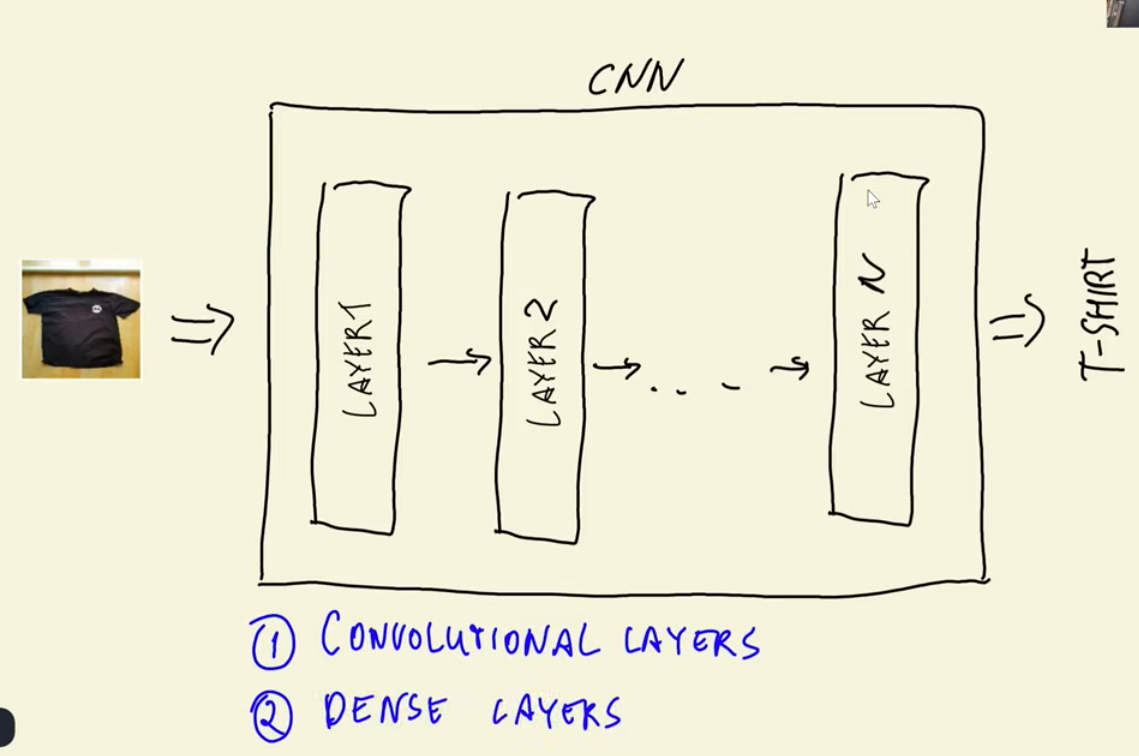</div>

Convolutional layers consist of filters which are like small images (5X5) or smaler. They contain simple shapes ot lines
<dic>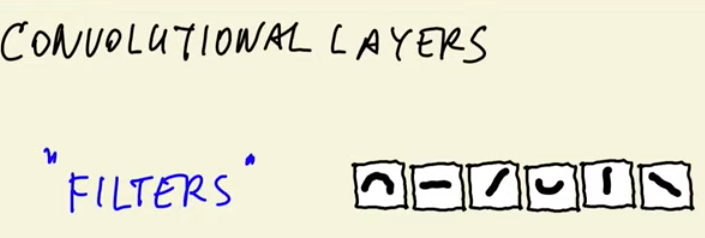</div>

Then we take our image and slide the filter across the image. Avery time we apply the filter to an image we see how similar this filter to the part of image. And the similarity data is filled to the table. 0 - no similarity, and higher number - bigger similarity. Feature map is the result of applying filter to the image
<div>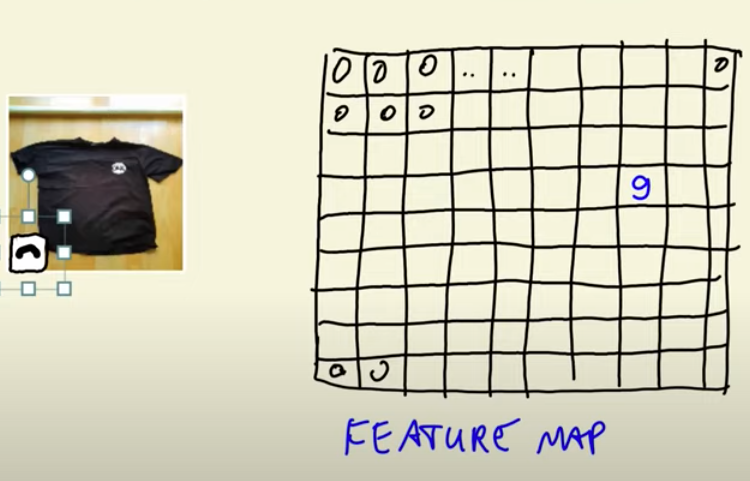</div>
For each filter we get a feature map

<div>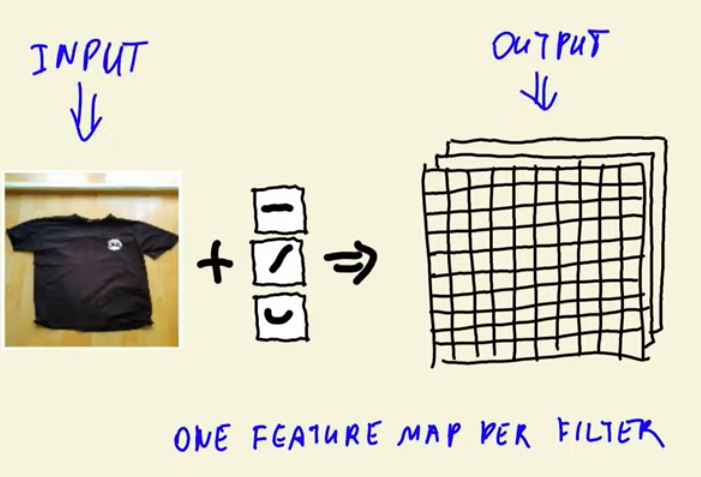</div>

Anothe convolutional layer is created by aplication of its own set of filters applied to the image was produced by first convolutional layer and it producr it's own feature map

<div>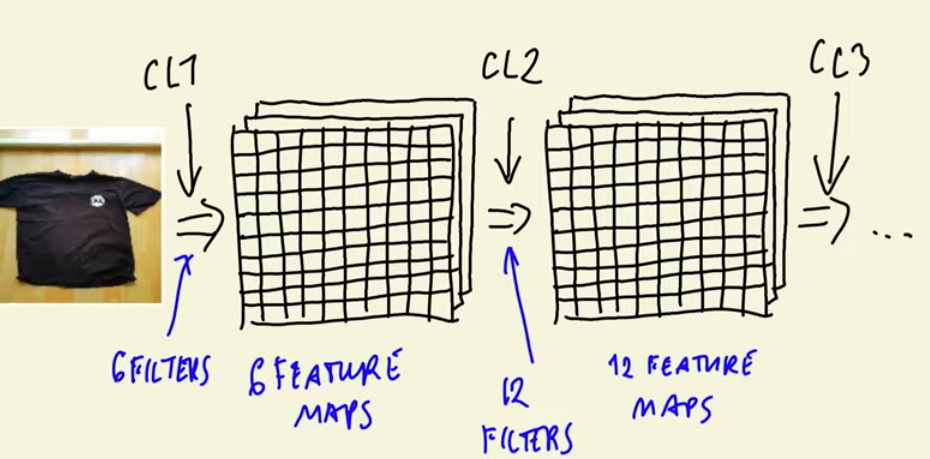</div>

Amount of created feature maps depends on amount of filters were applied to the image. Each convolutional layer can have more complex filters
<div>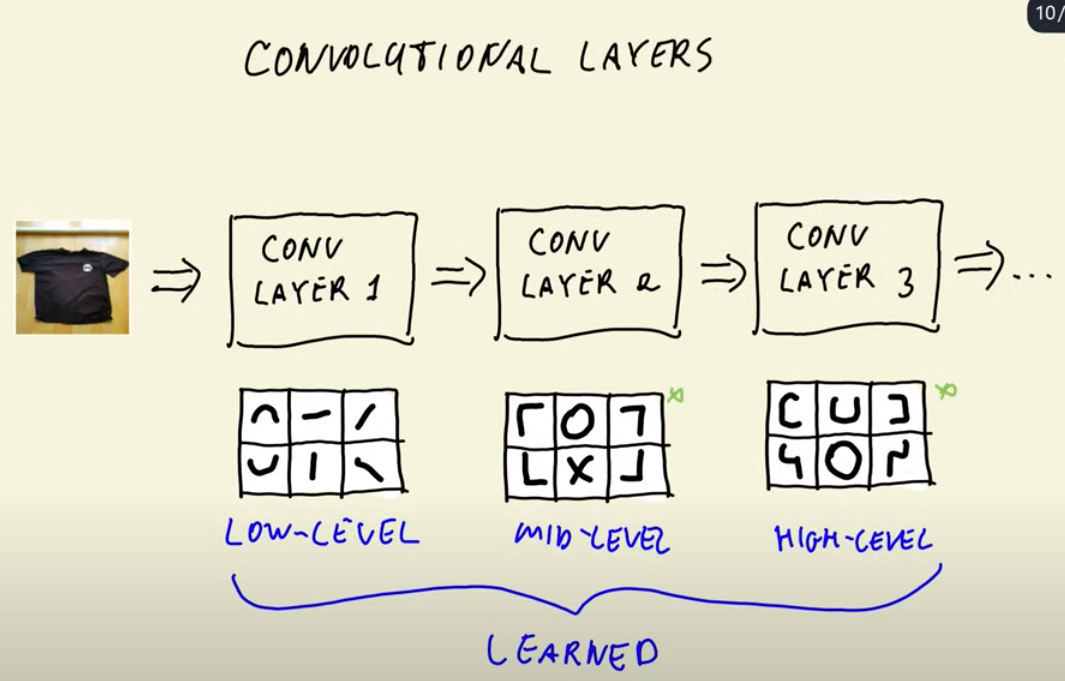</div>
Finaly, we will get the vector representation of an image

If convolutional layers are made to extract the vector representation, the dense layers are for making predictions
<div>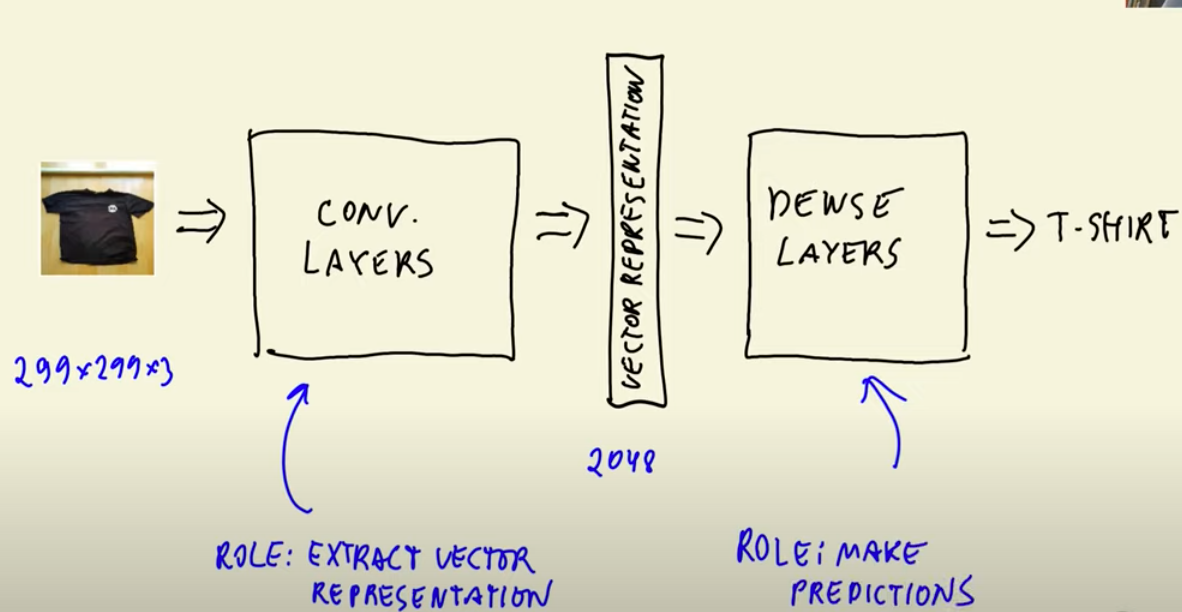</div>

Vector representation consist of numbers. With this vector we build the model which makes the prediction. For that we are using logistic regression
<dic>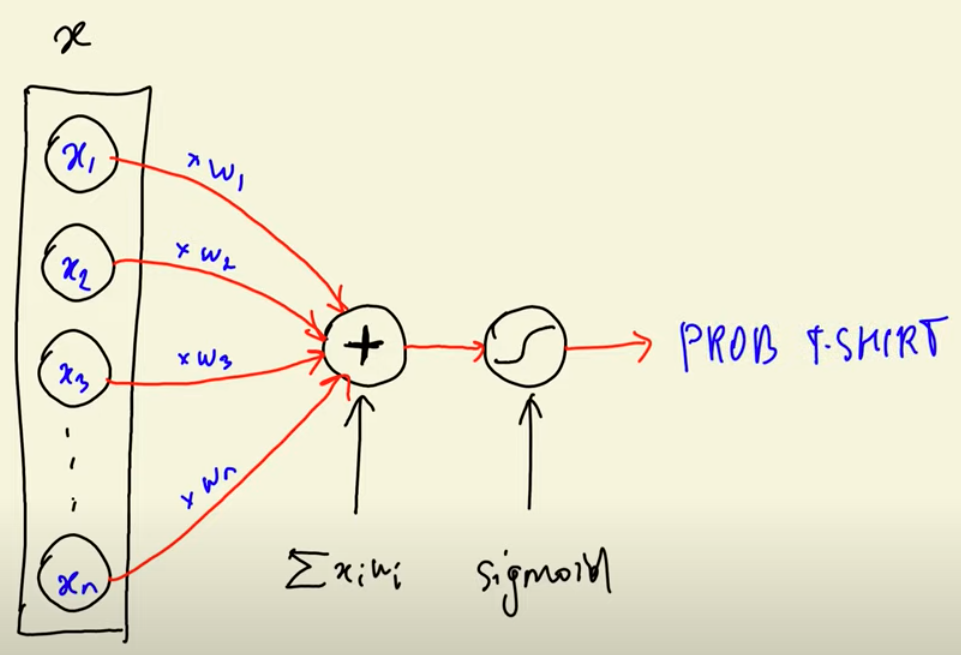</div>

For multipal classes we build multiple models. Instead of using sigmoid we are using softmax (generalization of sigmoid to multiple classes)
<div>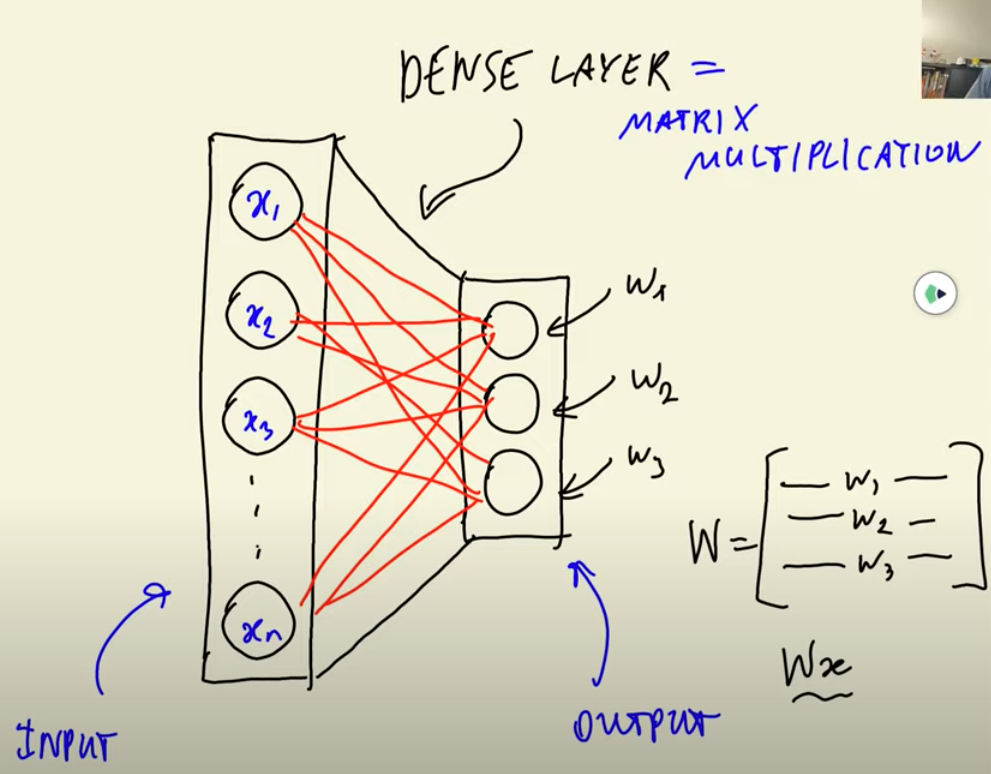</div>

So, finaly we get an image, turn it into a vector. Then it goes through some vector representation, then we convert the vectore representation into some inner representation and then convert it to output. Then this output should be 10 of them. We select one with the highest value which shoulb we the right answer.
<div>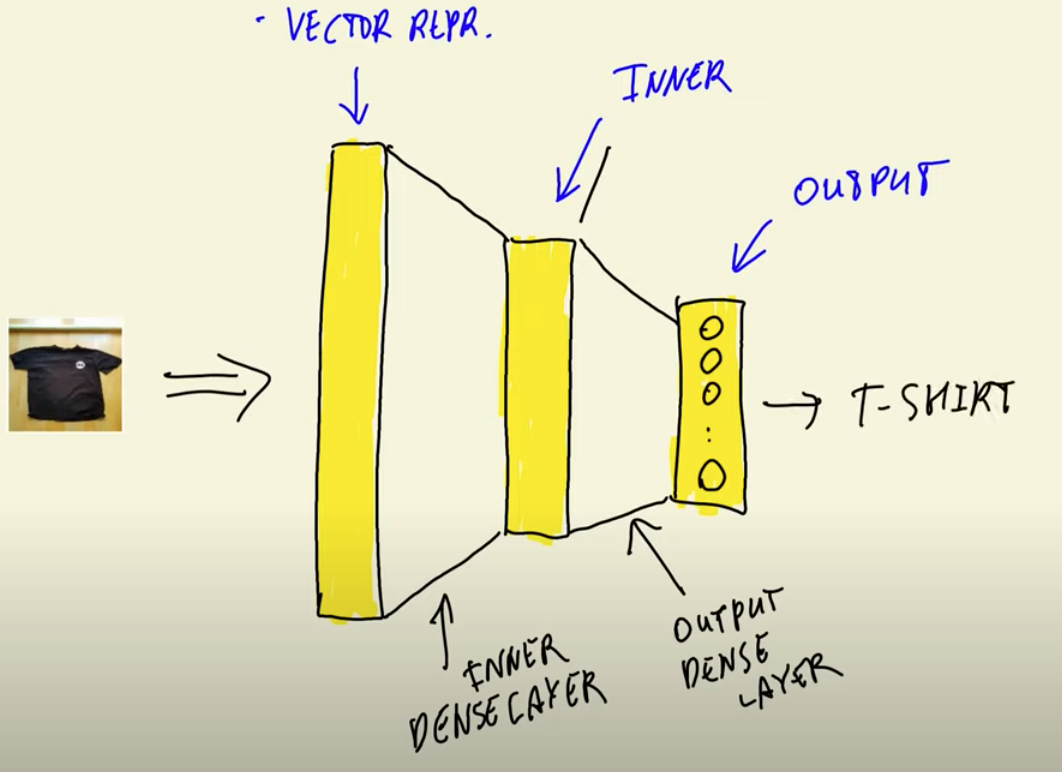</div>

Pooling layers take feature maps what one of conventional layers learned and makes it smaller

## 8.5 Tranfser learning

- Reading data with ImageDataGenerator

- Train Xception on smaller images (150x150)

(Better to run it with a GPU)

We will take pretrained model bacause the training process of conv layers is very difficult, needs a lot of images and it's generic. But dense layers are specific for a dataset and can be adjusted. For example we need to predict 10 classes only. The ready model predicts 1000 classes.

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


So, we have 32 images, (150X150) with 3 channels. Shape: (32, 150, 150, 3). After going though conv layer we will get 32 vectors, 32 predictions
Check kind of classes we have:

In [19]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [20]:
X, y = next(train_ds)

In [22]:
X.shape

(32, 150, 150, 3)

In [21]:
y[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Do the same for validation

In [23]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [24]:
base_model = Xception(
    weights='imagenet',
    include_top=False, #keep conv layer only
    input_shape=(150, 150, 3)
)

base_model.trainable = False #do not change conv layers


# Create new top
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False) #apply base model

vectors = keras.layers.GlobalAveragePooling2D()(base) #turning base (3d shape) into vectors

outputs = keras.layers.Dense(10)(vectors) #turn vectors into predictions (10 classes)

model = keras.Model(inputs, outputs) #fit into data and get prediction

83683744/83683744 [==============================] - 2s 0us/step


In [25]:
learning_rate = 0.01 #similar to eta in xgBoost
optimizer = keras.optimizers.Adam(learning_rate=learning_rate) 

loss = keras.losses.CategoricalCrossentropy(from_logits=True) #indicator of model quality

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [26]:
# train the model
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 208s 2s/step - loss: 1.2595 - accuracy: 0.6613 - val_loss: 1.0745 - val_accuracy: 0.7155
Epoch 2/10
96/96 [==============================] - 222s 2s/step - loss: 0.5663 - accuracy: 0.8224 - val_loss: 0.9919 - val_accuracy: 0.7713
Epoch 3/10
96/96 [==============================] - 193s 2s/step - loss: 0.3442 - accuracy: 0.8804 - val_loss: 0.9145 - val_accuracy: 0.7830
Epoch 4/10
96/96 [==============================] - 183s 2s/step - loss: 0.2393 - accuracy: 0.9094 - val_loss: 0.9027 - val_accuracy: 0.7683
Epoch 5/10
96/96 [==============================] - 185s 2s/step - loss: 0.1477 - accuracy: 0.9446 - val_loss: 0.8697 - val_accuracy: 0.8182
Epoch 6/10
96/96 [==============================] - 191s 2s/step - loss: 0.0898 - accuracy: 0.9739 - val_loss: 1.0394 - val_accuracy: 0.7683
Epoch 7/10
96/96 [==============================] - 164s 2s/step - loss: 0.0745 - accuracy: 0.9772 - val_loss: 1.0647 - val_accuracy: 0.7947
Epoch 8/10
96

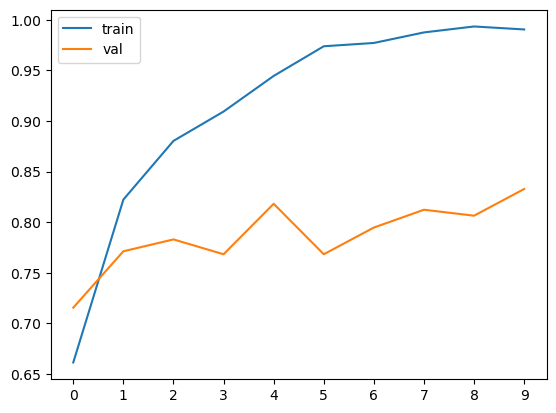

In [27]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## 8.6 Adjusting the learning rate

- What's the learning rate

- Trying different values

Learning rate is how fast learn

In [28]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [29]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 156s 2s/step - loss: 1.8746 - accuracy: 0.3745 - val_loss: 1.5186 - val_accuracy: 0.5425
Epoch 2/10
96/96 [==============================] - 144s 1s/step - loss: 1.3637 - accuracy: 0.5714 - val_loss: 1.2010 - val_accuracy: 0.6305
Epoch 3/10
96/96 [==============================] - 142s 1s/step - loss: 1.1334 - accuracy: 0.6441 - val_loss: 1.0364 - val_accuracy: 0.6891
Epoch 4/10
96/96 [==============================] - 141s 1s/step - loss: 1.0000 - accuracy: 0.6812 - val_loss: 0.9371 - val_accuracy: 0.7302
Epoch 5/10
96/96 [==============================] - 141s 1s/step - loss: 0.9098 - accuracy: 0.7080 - val_loss: 0.8744 - val_accuracy: 0.7595
Epoch 6/10
96/96 [==============================] - 140s 1s/step - loss: 0.8451 - accuracy: 0.7236 - val_loss: 0.8218 - val_accuracy: 0.7859
Epoch 7/10
96/96 [==============================] - 139s 1s/step - loss: 0.7923 - accuracy: 0.7419 - val_loss: 0.7880 - val_accuracy: 0.7947
Epoch 

In [30]:
del scores[0.1]
del scores[0.0001]

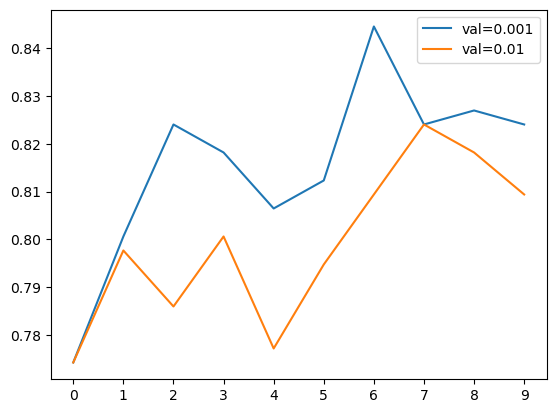

In [31]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [32]:
learning_rate = 0.001

## 8.7 Checkpointing

- Saving the best model only

- Training a model with callbacks

Checkpointing is a way of saving the model after each iteration or sertain conditions are met. After an epoch is over we can do callbacks and do anything we want. In keras callbacks leave in model called callback

In [33]:
model.save_weights('model_v1.h5', save_format='h5') #save the model

In [34]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True, #save the model only if there is an improvement (False =  save after each iteration)
    monitor='val_accuracy', #metrics
    mode='max' 
)

In [35]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
96/96 [==============================] - 213s 2s/step - loss: 1.0714 - accuracy: 0.6330 - val_loss: 0.7343 - val_accuracy: 0.7625
Epoch 2/10
96/96 [==============================] - 199s 2s/step - loss: 0.6321 - accuracy: 0.7875 - val_loss: 0.6312 - val_accuracy: 0.8035
Epoch 3/10
96/96 [==============================] - 195s 2s/step - loss: 0.5068 - accuracy: 0.8325 - val_loss: 0.5921 - val_accuracy: 0.8065
Epoch 4/10
96/96 [==============================] - 176s 2s/step - loss: 0.4264 - accuracy: 0.8598 - val_loss: 0.5649 - val_accuracy: 0.8035
Epoch 5/10
96/96 [==============================] - 182s 2s/step - loss: 0.3671 - accuracy: 0.8879 - val_loss: 0.5512 - val_accuracy: 0.8123
Epoch 6/10
96/96 [==============================] - 185s 2s/step - loss: 0.3253 - accuracy: 0.9025 - val_loss: 0.5603 - val_accuracy: 0.8035
Epoch 7/10
96/96 [==============================] - 199s 2s/step - loss: 0.2912 - accuracy: 0.9182 - val_loss: 0.5398 - val_accuracy: 0.8211
Epoch 8/10
96

## 8.8 Adding more layers

- Adding one inner dense layer

- Experimenting with different sizes of inner layer

It's possible to add aditional layers. It used to help. Let's see if it is true in our case.
<div>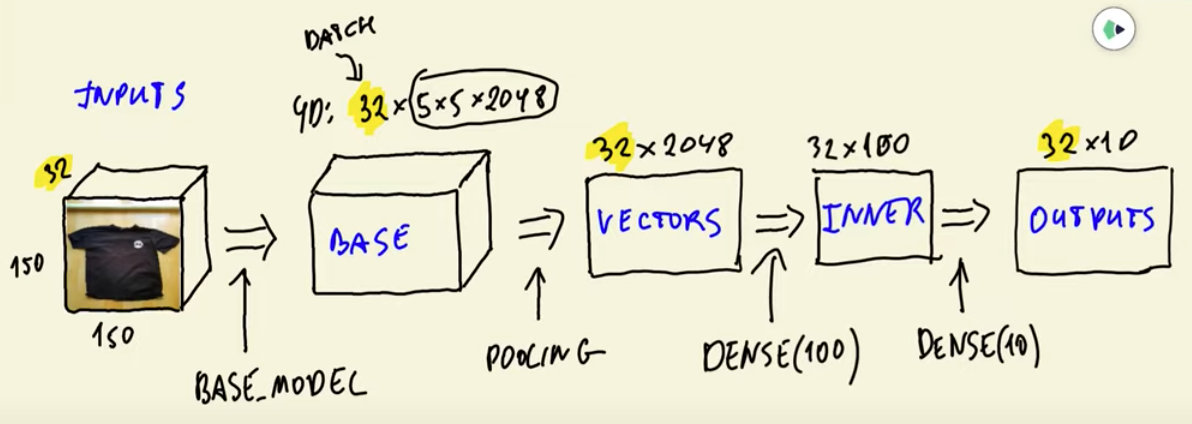</div>

But it's not enough. We need to make an activation - the transformation of raw scores frome dance layer into probability
<div>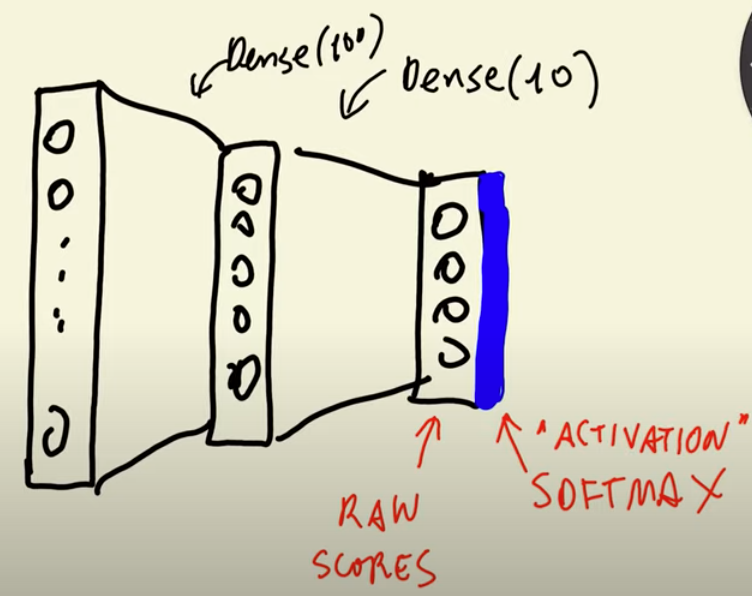</div>

In DL each layer needs some transformation to acheave better persormance. So we will perform Relu activation wich is used for activation of inintermediate layers

In [36]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors) #activation for intermediate layer
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [37]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 185s 2s/step - loss: 1.6500 - accuracy: 0.4263 - val_loss: 1.2334 - val_accuracy: 0.6158
Epoch 2/10
96/96 [==============================] - 194s 2s/step - loss: 1.0342 - accuracy: 0.6604 - val_loss: 0.9157 - val_accuracy: 0.7009
Epoch 3/10
96/96 [==============================] - 181s 2s/step - loss: 0.8046 - accuracy: 0.7304 - val_loss: 0.7923 - val_accuracy: 0.7449
Epoch 4/10
96/96 [==============================] - 161s 2s/step - loss: 0.6600 - accuracy: 0.7823 - val_loss: 0.7063 - val_accuracy: 0.7713
Epoch 5/10
96/96 [==============================] - 170s 2s/step - loss: 0.5557 - accuracy: 0.8152 - val_loss: 0.6514 - val_accuracy: 0.7977
Epoch 6/10
96/96 [==============================] - 185s 2s/step - loss: 0.4737 - accuracy: 0.8494 - val_loss: 0.5953 - val_accuracy: 0.8006
Epoch 7/10
96/96 [==============================] - 195s 2s/step - loss: 0.4091 - accuracy: 0.8732 - val_loss: 0.5730 - val_accuracy: 0.8006
Epoch 8/10

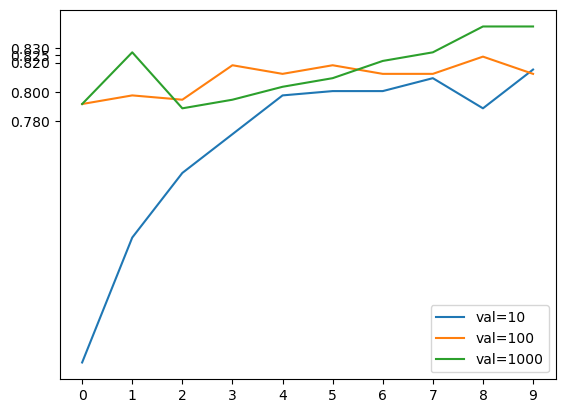

In [38]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## 8.9 Regularization and dropout

- Regularizing by freezing a part of the network

- Adding dropout to our model

- Experimenting with different values

To improve the model performance we could hide the fragment of the image, each epoch the different one. Dropout doesn't really hides the image but applies this idea to inner layers. Let's see how it happenes.
<div>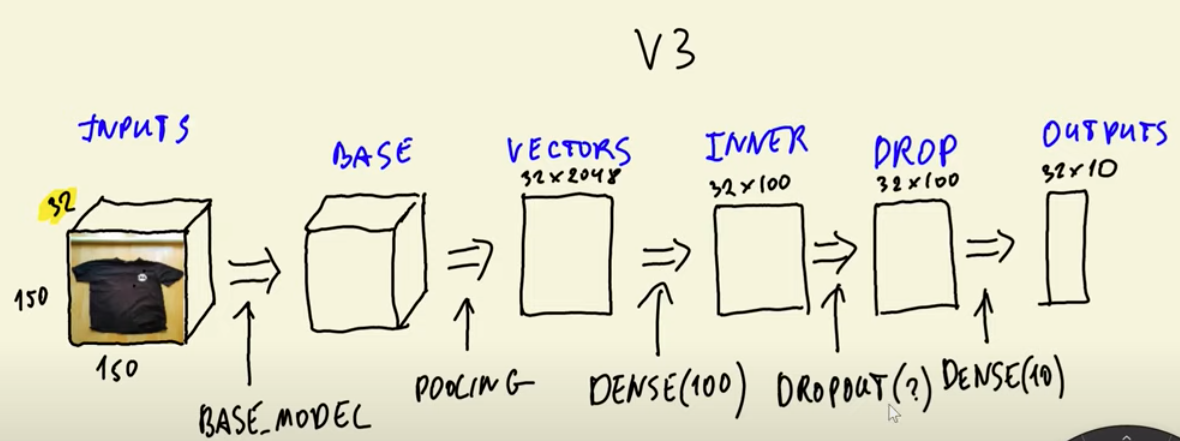</div>

In [39]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner) #dropout, droprate, % of network will be frosen
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [ ]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 [==============================] - 148s 2s/step - loss: 0.9436 - accuracy: 0.6741 - val_loss: 0.6758 - val_accuracy: 0.7801
Epoch 2/30
96/96 [==============================] - 169s 2s/step - loss: 0.5062 - accuracy: 0.8282 - val_loss: 0.6330 - val_accuracy: 0.7830
Epoch 3/30
96/96 [==============================] - 181s 2s/step - loss: 0.3466 - accuracy: 0.8804 - val_loss: 0.5884 - val_accuracy: 0.8123
Epoch 4/30
96/96 [==============================] - 193s 2s/step - loss: 0.2501 - accuracy: 0.9234 - val_loss: 0.5737 - val_accuracy: 0.8123
Epoch 5/30
96/96 [==============================] - 193s 2s/step - loss: 0.1793 - accuracy: 0.9531 - val_loss: 0.5690 - val_accuracy: 0.8182
Epoch 6/30
96/96 [==============================] - 196s 2s/step - loss: 0.1449 - accuracy: 0.9593 - val_loss: 0.6270 - val_accuracy: 0.8152
Epoch 7/30
96/96 [==============================] - 193s 2s/step - loss: 0.0847 - accuracy: 0.9844 - val_loss: 0.5892 - val_accuracy: 0.8299
Epoch 8/3

In [ ]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

In [ ]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 8.10 Data augmentation

- Different data augmentations

- Training a model with augmentations

- How to select data augmentations?

Another approach to solve the problem of recognition of the same pattern on different clothes is generation of more images from existing ones. Easiest is flip the image. Image can be rotated, hight shift, width shift, shear, zoom_x, zoom_y, change brightness and contrast etc, also combine all of them.

We need to use our own judgment to decide what kind of variations make sence
<div>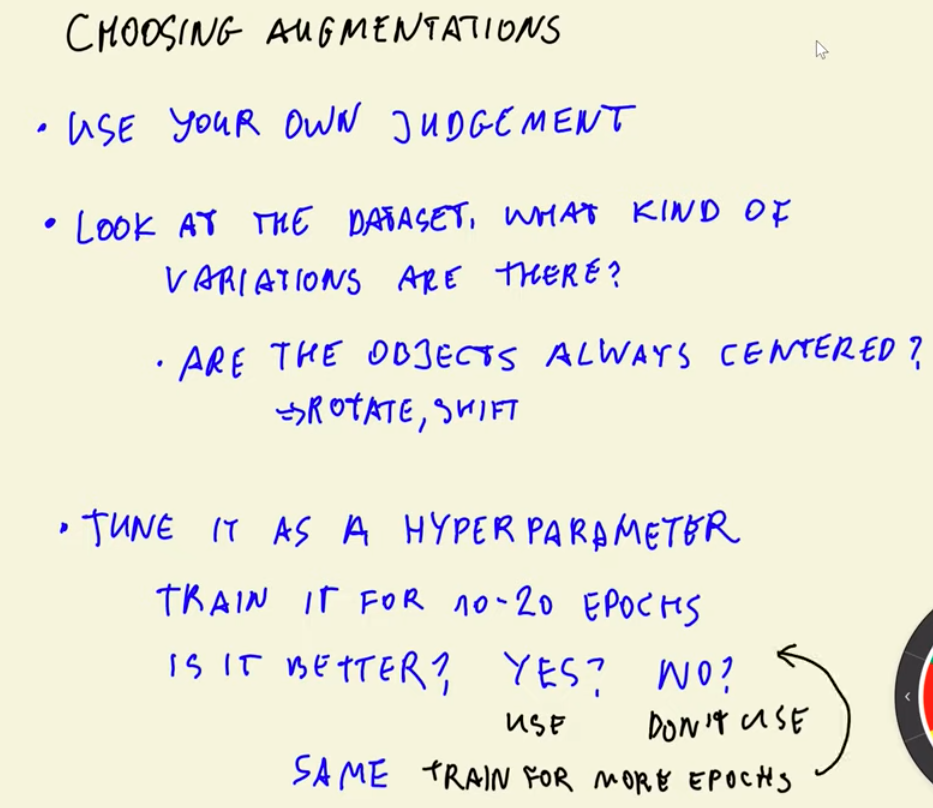</div>

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

In [ ]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.11 Training a larger model

Train a 299x299 model

In [ ]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [ ]:
input_size = 299

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

## 8.12 Using the model

- Loading the model

- Evaluating the model

- Getting predictions

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [ ]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

In [ ]:
model = keras.models.load_model('xception_v4_1_13_0.903.h5')

In [ ]:
model.evaluate(test_ds)

In [ ]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'